In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
data=pd.read_csv('spam_ham_dataset.csv')

In [46]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [47]:
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [49]:
data.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


<AxesSubplot:>

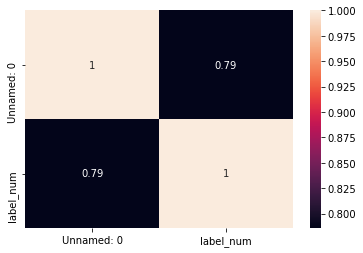

In [50]:
sns.heatmap(data.corr(),annot=True)

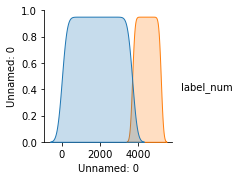

In [53]:
sns.pairplot(data,hue='label_num')

In [10]:
data.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

#### To check null values 

In [36]:
data[data.isnull().any(axis=1)]

,Unnamed: 0,label,text,label_num


####  Label Encoding for categorical data  

In [12]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

In [13]:
data['label']=encode.fit_transform(data['label'])
data['text']=encode.fit_transform(data['text'])

In [14]:
data

,Unnamed: 0,label,text,label_num
0,605,0,1209,0
1,2349,0,1985,0
2,3624,0,2774,0
3,4685,1,3158,1
4,2030,0,3613,0
...,...,...,...,...
5166,1518,0,3254,0
5167,404,0,125,0
5168,2933,0,495,0
5169,1409,0,2223,0


#### Choosing X and y 

In [15]:
X=data.drop(['label_num'],axis=1)
y=data['label_num']

#### Splitting the dataset 

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [42]:
# Logistic regression fit 
lo=LogisticRegression()
lo.fit(x_train,y_train)
y_pred=lo.predict(x_test)

#### Evaluation Metrics

In [43]:
from sklearn.metrics import f1_score
print('f1_score : ',f1_score(y_test,y_pred,average='micro'))

f1_score :  1.0


In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[1094    0]
 [   0  458]]


In [27]:
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1094
           1       1.00      1.00      1.00       458

    accuracy                           1.00      1552
   macro avg       1.00      1.00      1.00      1552
weighted avg       1.00      1.00      1.00      1552

